## Varying Number of Rows/Attributes

In [ ]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from duckdq import VerificationSuite, Check, CheckLevel
import great_expectations as ge
from matplotlib import pyplot
import pandas as pd
import time

results = pd.DataFrame(columns=["n_features","n_samples","t_predict","t_hooqu","t_ge","t_ddq_no_sharing","t_ddq"])

for n_features in [2,4,8,16,32,64,128,256,512]:
    for n_samples in [10000,100000,1000000,2000000,3000000,4000000,5000000]:

        print(f'{n_features}/{n_samples}', end='\r')
        X, y = make_regression(n_samples=n_samples, n_features=n_features, noise=0.1)
        X_df = pd.DataFrame(X,columns=[f"col{i}" for i in range(0,n_features)])
        if n_samples < 10000:
            reg = LinearRegression().fit(X_df, y)
        
        start = time.time()
        result = reg.predict(X_df)
        t_predict = time.time()-start

        start = time.time()
        ge_df = ge.from_pandas(X_df)
        for i in range(0,n_features):
            ge_df.expect_column_values_to_not_be_null(f"col{i}")
            ge_df.expect_column_max_to_be_between(f"col{i}",-10000,10000)
            ge_df.expect_column_min_to_be_between(f"col{i}",-10000,10000)
            #ge_df.expect_column_values_to_be_unique(i) 
        t_ge = time.time()-start
        
        start = time.time()
        check = Check(CheckLevel.WARNING, "Basic Check")
        for i in range(0,n_features):
            check = check.is_complete(f"col{i}")
            check = check.has_max(f"col{i}",lambda x: x>-10000 and x<10000)
            check = check.has_min(f"col{i}",lambda x: x>-10000 and x<10000)
        verification_result = VerificationSuite().on_data(X_df).add_check(check).run()
        t_hooqu = time.time()-start
        
        start = time.time()
        check = Check(CheckLevel.WARNING, "Basic Check")
        for i in range(0,n_features):
            check = check.is_complete(f"col{i}")
            check = check.has_max(f"col{i}",lambda x: x>-10000 and x<10000)
            check = check.has_min(f"col{i}",lambda x: x>-10000 and x<10000)
            #check.is_unique(f"{i}")
        VerificationSuite().on_data_no_sharing(X_df, dataset_id="data10", partition_id="1").add_check(check).run()
        t_ddq_no_sharing = time.time()-start
       
        start = time.time()
        check = Check(CheckLevel.WARNING, "Basic Check")
        for i in range(0,n_features):
            check = check.is_complete(f"col{i}")
            check = check.has_max(f"col{i}",lambda x: x>-10000 and x<10000)
            check = check.has_min(f"col{i}",lambda x: x>-10000 and x<10000)
            #check.is_unique(f"{i}")
        VerificationSuite().on_data(X_df, dataset_id="data10", partition_id="1").add_check(check).run()
        t_ddq = time.time()-start
        
    
        result = {"n_features":n_features,"n_samples":n_samples,"t_predict":t_predict,"t_hooqu": t_hooqu, "t_ge":t_ge,"t_ddq_no_sharing":t_ddq_no_sharing,"t_ddq":t_ddq}
        print(result)
        results = results.append(result,ignore_index=True)
        
results

## Varying Number of Rows/Attributes (Plots)

c:\users\doehmen\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


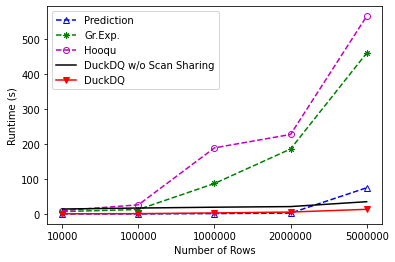

In [3]:
import matplotlib.pyplot as plt
import numpy as np

#n_features = 512
x=["10000","100000","1000000","2000000","5000000"]
t_pred=[0.011999,0.079,0.987033,2.290064,74.612111]
t_ge=[6.695035,12.610042,86.829963,185.248113,458.837164]
t_ddq_no_sharing=[14.009964,16.806913,19.141129,20.943995,34.887152]
t_ddq=[0.509003,0.776893,2.816573,5.328697,13.102823]
t_hooqu=[9.380331,25.994293,188.50,226.667,564.01]

fig=plt.figure()
fig.show()
ax=fig.add_subplot(111)

ax.plot(x,t_pred,c='b',marker="^",ls='--',label='Prediction',fillstyle='none')
ax.plot(x,t_ge,c='g',marker=(8,2,0),ls='--',label='Gr.Exp.')
ax.plot(x,t_hooqu,c='m',marker="o",ls='--',label='Hooqu',fillstyle='none')
ax.plot(x,t_ddq_no_sharing,c='k',ls='-',label='DuckDQ w/o Scan Sharing')
ax.plot(x,t_ddq,c='r',marker="v",ls='-',label='DuckDQ')
plt.xlabel("Number of Rows")
plt.ylabel("Runtime (s)")
plt.legend(loc=2)
plt.draw()
plt.savefig('rows_3.svg')  

c:\users\doehmen\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


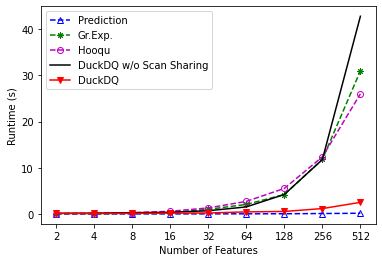

In [6]:
import matplotlib.pyplot as plt
import numpy as np

#n_samples=100000
x=["2","4","8","16","32","64","128","256","512"]
t_pred=[0.007988,0.004947,0.00405,0.004963,0.013036,0.022009,0.041021,0.088883,0.149774]
t_ge=[0.050997,0.05906,0.166001,0.300858,0.995968,2.050748,4.200836,11.794218,30.966018]
t_ddq_no_sharing=[0.134038,0.162456,0.26201,0.359851,0.690358,1.520228,4.214267,11.764438,42.784239]
t_ddq=[0.126809,0.094388,0.130358,0.176325,0.207185,0.441273,0.53302,1.162102,2.508146]
t_hooqu=[0.082304,0.09225,0.259304,0.572227,1.299819,2.71348,5.515677,12.35099,25.994293]

fig=plt.figure()
fig.show()
ax=fig.add_subplot(111)

ax.plot(x,t_pred,c='b',marker="^",ls='--',label='Prediction',fillstyle='none')
ax.plot(x,t_ge,c='g',marker=(8,2,0),ls='--',label='Gr.Exp.')
ax.plot(x,t_hooqu,c='m',marker="o",ls='--',label='Hooqu',fillstyle='none')
ax.plot(x,t_ddq_no_sharing,c='k',ls='-',label='DuckDQ w/o Scan Sharing')
ax.plot(x,t_ddq,c='r',marker="v",ls='-',label='DuckDQ')
plt.xlabel("Number of Features")
plt.ylabel("Runtime (s)")
plt.legend(loc=2)
plt.draw()
plt.savefig('features_3.svg')  